<a href="https://colab.research.google.com/github/luan-crvlh/EDA_Spotify/blob/main/EDA_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Importação do dataset*

In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Download latest version
path = kagglehub.dataset_download("zaheenhamidani/ultimate-spotify-tracks-db")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ultimate-spotify-tracks-db


# Análise Exploratória

In [ ]:
os.chdir(path)
dataSongs = pd.read_csv("SpotifyFeatures.csv")
dataSongsCleaned = dataSongs.dropna(axis = 0)
dataSongs = dataSongsCleaned
dataSongsCleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232724 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232724 non-null  object 
 1   artist_name       232724 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232724 non-null  object 
 4   popularity        232724 non-null  int64  
 5   acousticness      232724 non-null  float64
 6   danceability      232724 non-null  float64
 7   duration_ms       232724 non-null  int64  
 8   energy            232724 non-null  float64
 9   instrumentalness  232724 non-null  float64
 10  key               232724 non-null  object 
 11  liveness          232724 non-null  float64
 12  loudness          232724 non-null  float64
 13  mode              232724 non-null  object 
 14  speechiness       232724 non-null  float64
 15  tempo             232724 non-null  float64
 16  time_signature    232724 

# **Popularidade**

## 20 mais populares sem filtro

In [ ]:
top_populares = dataSongsCleaned[['artist_name', 'genre', 'track_name', 'popularity']].sort_values('popularity', ascending=False)
display(top_populares[['artist_name', 'genre', 'track_name', 'popularity']].head(20).style.set_caption("Top 20 músicas mais populares"))

,artist_name,genre,track_name,popularity
9027,Ariana Grande,Dance,7 rings,100
107804,Ariana Grande,Pop,7 rings,100
107802,Ariana Grande,Pop,"break up with your girlfriend, i'm bored",99
9026,Ariana Grande,Dance,"break up with your girlfriend, i'm bored",99
86951,Post Malone,Rap,Wow.,99
107803,Post Malone,Pop,Wow.,99
66643,Daddy Yankee,Hip-Hop,Con Calma,98
138918,Daddy Yankee,Reggaeton,Con Calma,98
107909,Daddy Yankee,Pop,Con Calma,98
107806,Post Malone,Pop,Sunflower - Spider-Man: Into the Spider-Verse,97


## 20 mais populares com filtro

In [ ]:
top_populares_sem_duplicatas = top_populares.sort_values('popularity', ascending=False).drop_duplicates(subset=['track_name'], keep='first')

display(
    top_populares_sem_duplicatas
    .head(20)[['artist_name', 'genre', 'track_name', 'popularity']]
    .style.set_caption("Top 20 músicas mais populares sem duplicatas")
)

,artist_name,genre,track_name,popularity
107804,Ariana Grande,Pop,7 rings,100
9026,Ariana Grande,Dance,"break up with your girlfriend, i'm bored",99
86951,Post Malone,Rap,Wow.,99
66643,Daddy Yankee,Hip-Hop,Con Calma,98
9037,Ava Max,Dance,Sweet but Psycho,97
92824,Halsey,Indie,Without Me,97
107806,Post Malone,Pop,Sunflower - Spider-Man: Into the Spider-Verse,97
107812,Marshmello,Pop,Happier,97
107810,Sam Smith,Pop,Dancing With A Stranger (with Normani),97
107875,Pedro Capó,Pop,Calma - Remix,97


## Média de popularidade

In [ ]:
meanPopularity = top_populares_sem_duplicatas['popularity'].mean()
print(f"Média de popularidade das faixas: {meanPopularity:.2f}")
meanDataset = top_populares['popularity'].mean()
print(meanDataset)
# Isso mostra que haviam dados não limpos na tabela - ou dados repetidos - de modo que a média estava sendo afetada.

Média de popularidade das faixas: 36.54
41.12749007407917


## Correlação entre as faixas de 80+ de popularidade

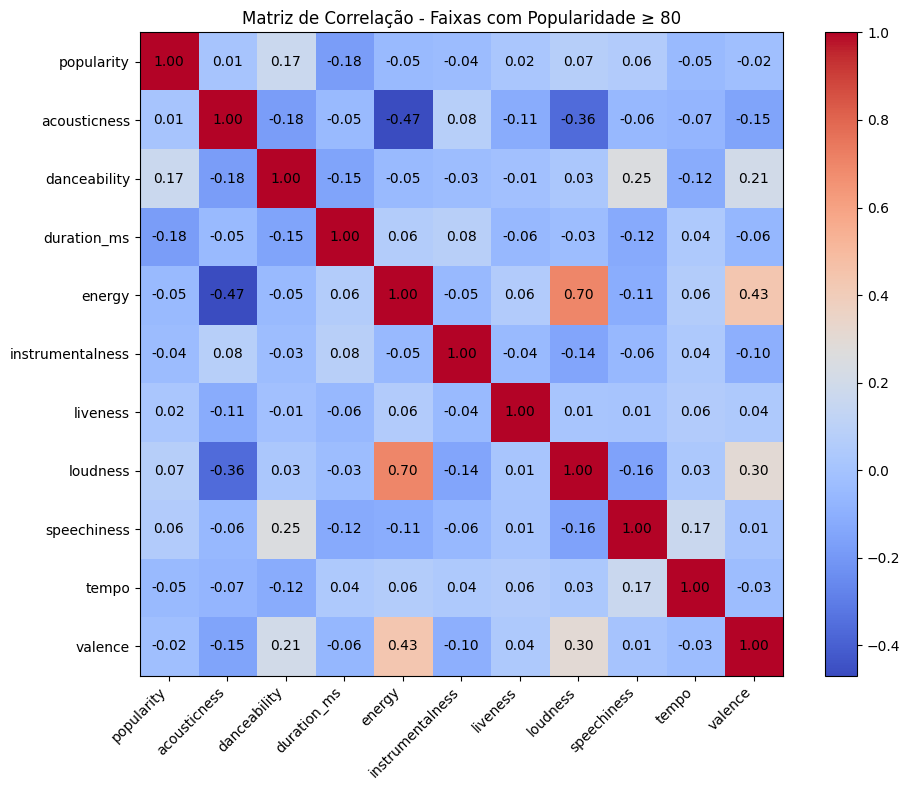

In [ ]:
# Filtra as faixas com popularidade >= 80
top_popular_tracks = dataSongsCleaned[dataSongsCleaned['popularity'] >= 80]

# Seleciona colunas numéricas para a correlação
numerical_columns = [
    'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness',
    'speechiness', 'tempo', 'valence'
]

# Calcula a matriz de correlação
correlation = top_popular_tracks[numerical_columns].corr()

# Plot da matriz de correlação
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Eixos
plt.xticks(np.arange(len(correlation.columns)), correlation.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation.index)), correlation.index)

plt.title('Matriz de Correlação - Faixas com Popularidade ≥ 80')

# Adiciona valores numéricos nas células
for i in range(len(correlation.columns)):
    for j in range(len(correlation.index)):
        plt.text(j, i, f"{correlation.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


Conclusão: Em geral, nenhum elemento numérico dá qualquer indício de correlação com a popularidade. Porém, isso significa apenas que não há relação direta com essas colunas escolhidas, talvez tenha relação com outros elementos do conjunto de dados.

### Divisão considerando gêneros

In [ ]:
# Filtrar faixas populares
top_popular_tracks = dataSongsCleaned[dataSongsCleaned['popularity'] >= 80]

# Contar quantas faixas populares existem por gênero
top_genres = top_popular_tracks['genre'].value_counts().reset_index()
top_genres.columns = ['Genre', 'Number of Popular Tracks']

# Exibir como tabela estilizada
display(
    top_genres.style.set_caption("Quantidade de Faixas Populares (popularity ≥ 80) por Gênero")
                     .hide(axis="index")
                     .format({'Number of Popular Tracks': '{:.0f}'})
)
#Total = 1.239

Genre,Number of Popular Tracks
Pop,462
Rap,209
Dance,167
Hip-Hop,146
Rock,64
Reggaeton,61
R&B,58
Indie,28
Children’s Music,21
Folk,7


### Divisão considerando artistas

In [ ]:
# Filtrar faixas populares
top_popular_tracks = dataSongsCleaned[dataSongsCleaned['popularity'] >= 80]

# Calcular média de popularidade por artista
mean_pop_by_artist = (
    top_popular_tracks
    .groupby('artist_name')['popularity']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

mean_pop_by_artist.columns = ['Artist Name', 'Mean Popularity']

# Obter o gênero mais comum (moda) para cada artista
genre_by_artist = (
    top_popular_tracks
    .groupby('artist_name')['genre']
    .agg(lambda x: x.mode().iloc[0])  # pega o gênero mais frequente
    .reset_index()
)

genre_by_artist.columns = ['Artist Name', 'Predominant Genre']

# Mesclar os dois DataFrames
mean_pop_with_genre = pd.merge(mean_pop_by_artist, genre_by_artist, on='Artist Name')

# Exibir os 50 artistas com maior média de popularidade e seus gêneros
display(
    mean_pop_with_genre.head(10)
        .style.set_caption("Top 10 Artistas com Maior Média de Popularidade (popularity ≥ 80)")
        .hide(axis="index")
        .format({'Mean Popularity': '{:.3f}'})
)

Artist Name,Mean Popularity,Predominant Genre
Ava Max,97.000,Dance
Pedro Capó,97.000,Pop
Panic! At The Disco,95.000,Pop
Meek Mill,95.000,Hip-Hop
Mau y Ricky,93.000,Pop
Jonas Brothers,92.500,Dance
Ellie Goulding,92.000,Dance
Sheck Wes,92.000,Hip-Hop
Alec Benjamin,92.000,Dance
Mustard,91.000,Hip-Hop


### Avaliando o top 50

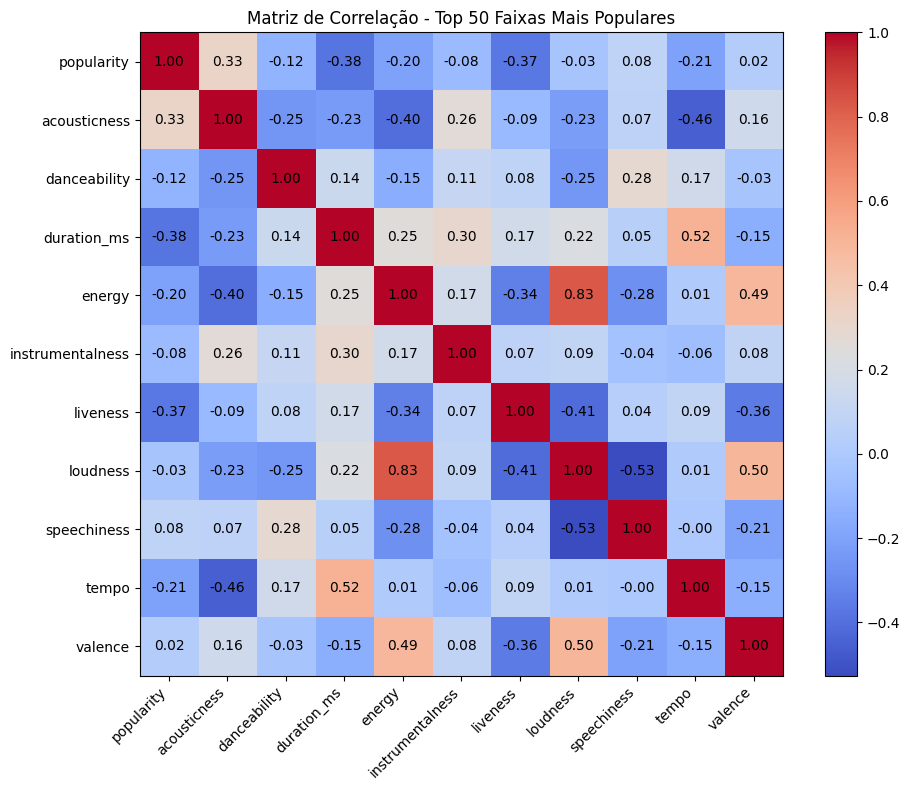

In [ ]:
top_50 = dataSongsCleaned.sort_values('popularity', ascending=False).head(50)
#display(top_50.describe())
numericas_top_50 = top_50.select_dtypes(include='number')

# Calcular correlação
correlation = numericas_top_50.corr()

# Plotar o heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

# Ticks nos eixos com nomes das colunas
plt.xticks(np.arange(len(correlation.columns)), correlation.columns, rotation=45, ha='right')
plt.yticks(np.arange(len(correlation.index)), correlation.index)

plt.title('Matriz de Correlação - Top 50 Faixas Mais Populares')

# Adicionar os valores numéricos dentro da matriz
for i in range(len(correlation.columns)):
    for j in range(len(correlation.index)):
        plt.text(j, i, f"{correlation.iloc[i, j]:.2f}", ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

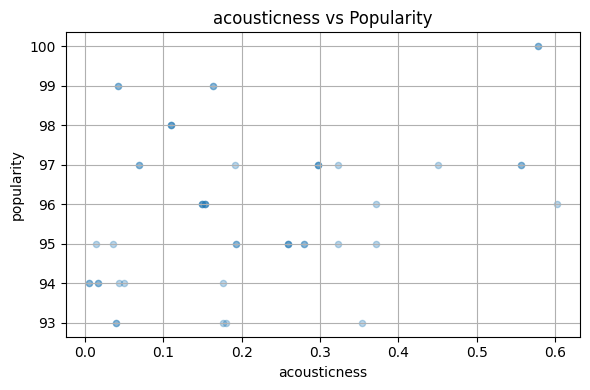

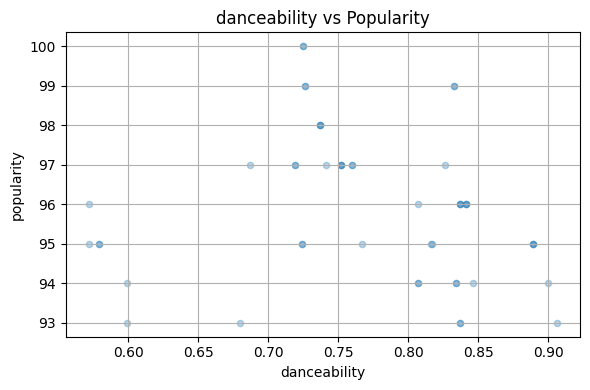

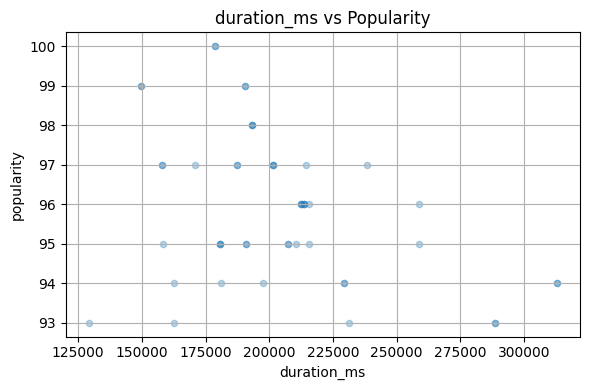

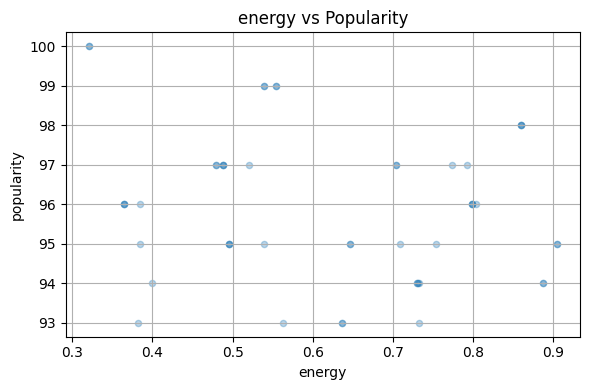

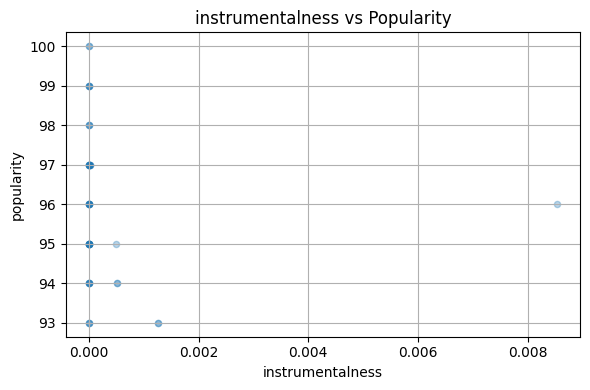

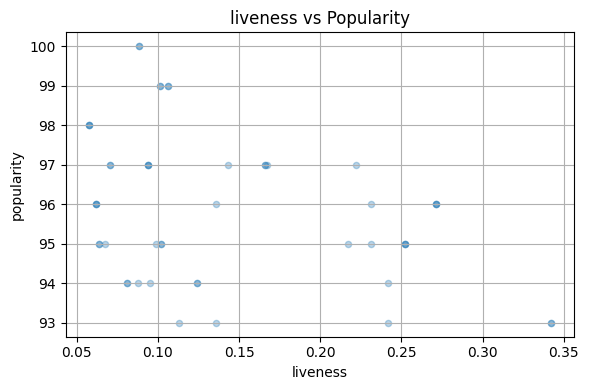

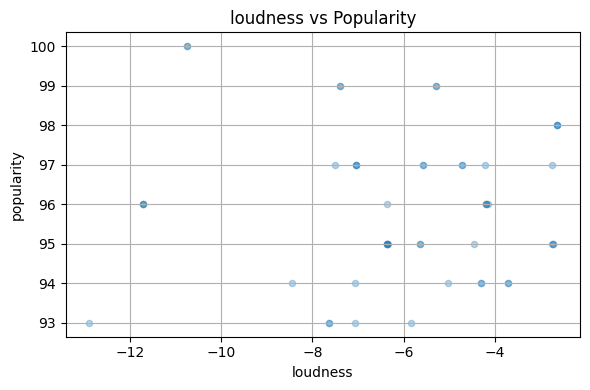

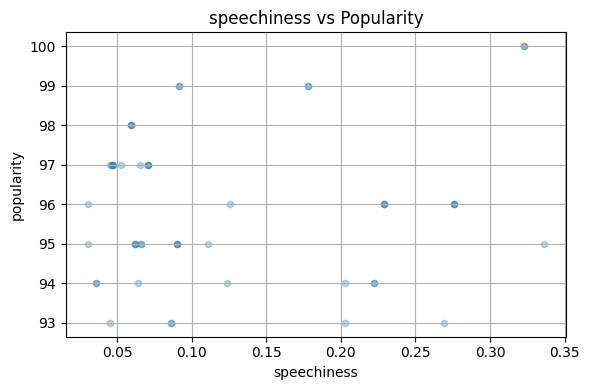

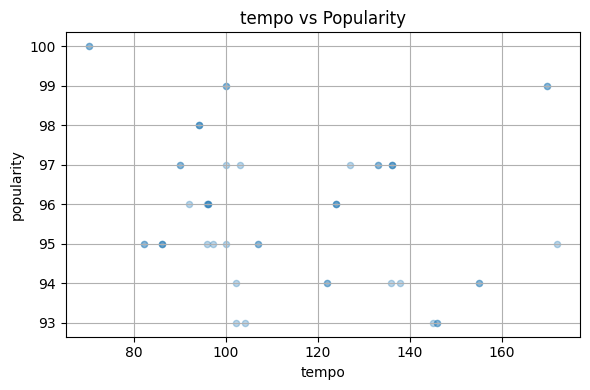

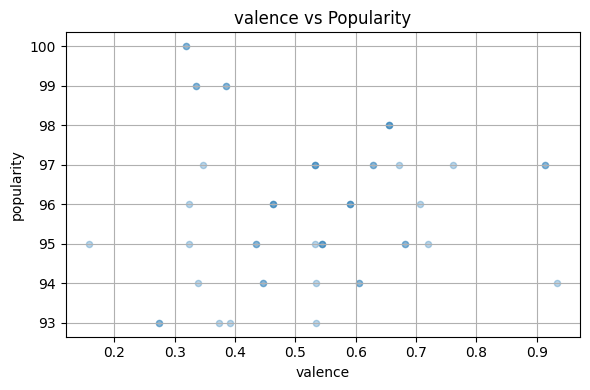

In [ ]:
cols_to_plot = [
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'valence'
]

# Criar scatterplots para cada uma em relação à popularidade
for col in cols_to_plot:
    top_50.plot.scatter(x=col, y='popularity', alpha=0.3, figsize=(6, 4), title=f'{col} vs Popularity')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

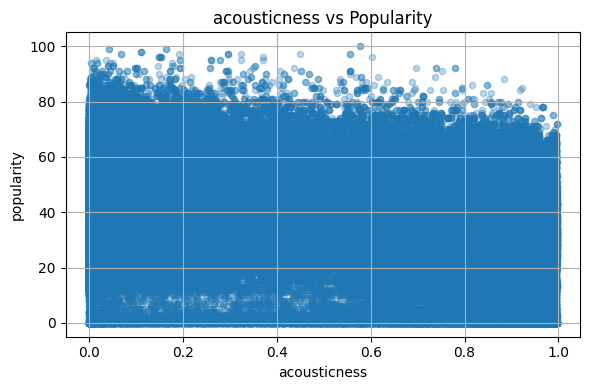

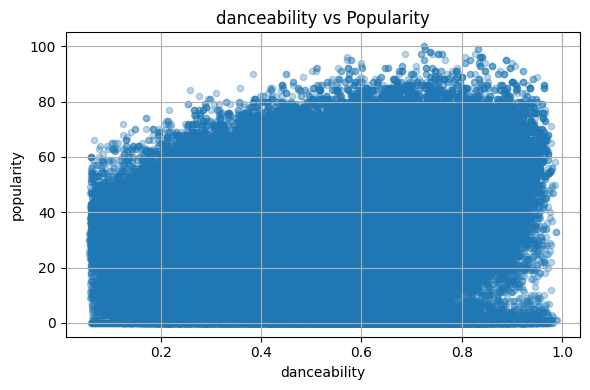

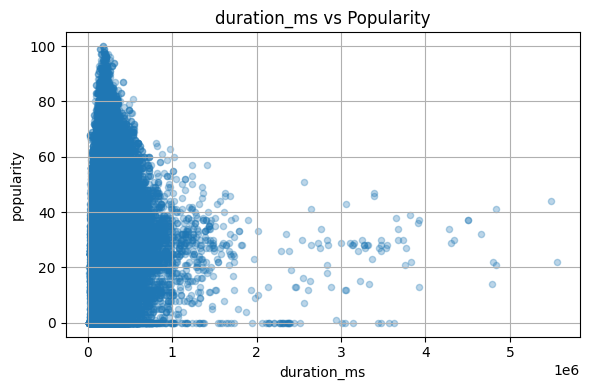

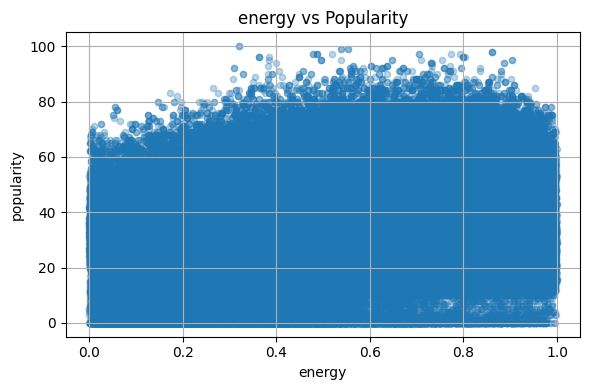

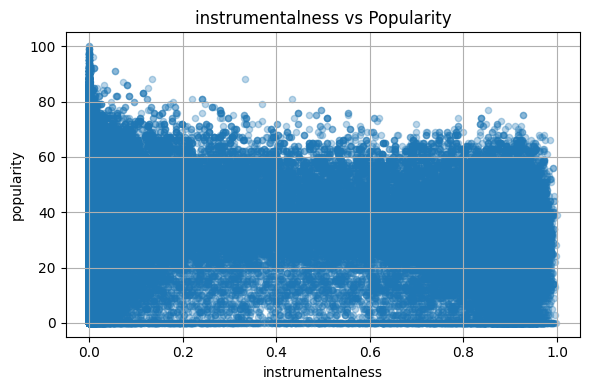

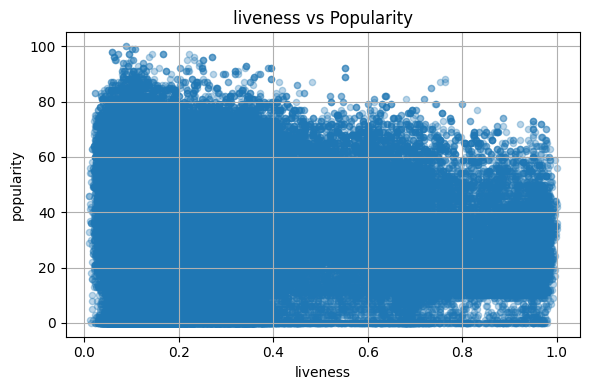

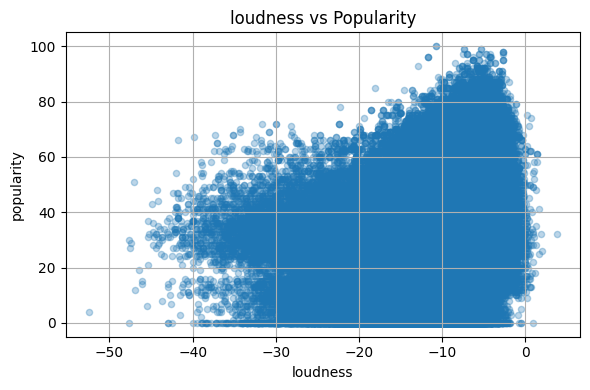

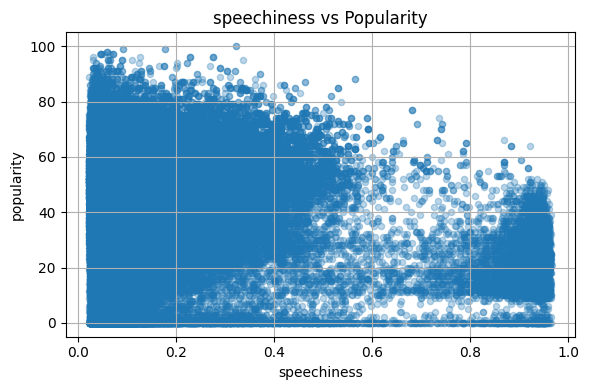

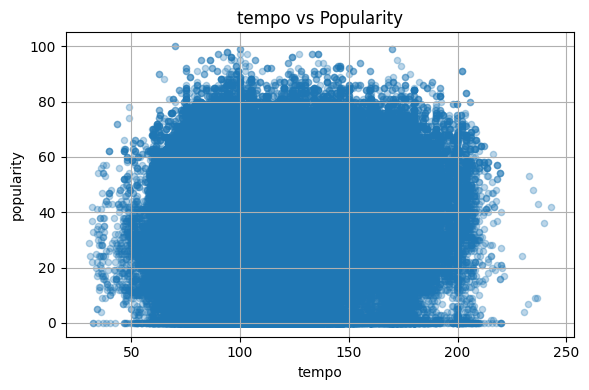

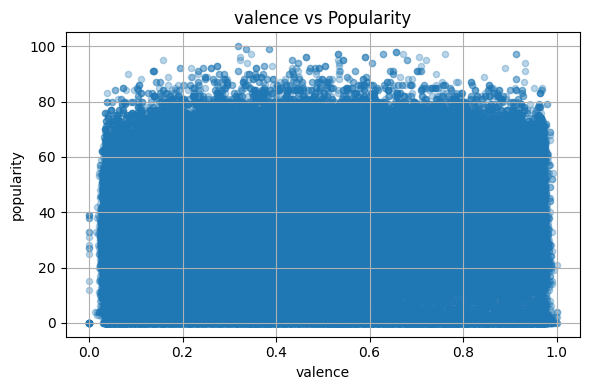

In [ ]:
cols_to_plot = [
    'acousticness',
    'danceability',
    'duration_ms',
    'energy',
    'instrumentalness',
    'liveness',
    'loudness',
    'speechiness',
    'tempo',
    'valence'
]

# Criar scatterplots para cada uma em relação à popularidade
for col in cols_to_plot:
    dataSongs.plot.scatter(x=col, y='popularity', alpha=0.3, figsize=(6, 4), title=f'{col} vs Popularity')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Gêneros mais comuns do dataset

In [ ]:
# Filtrar faixas populares
top_popular_tracks = dataSongsCleaned

# Contar quantas faixas populares existem por gênero
top_genres = top_popular_tracks['genre'].value_counts().reset_index()
top_genres.columns = ['Genre', 'Number of Popular Tracks']

# Exibir como tabela estilizada
display(
    top_genres.style.set_caption("Quantidade de Faixas por Gênero")
                     .hide(axis="index")
                     .format({'Number of Popular Tracks': '{:.0f}'})
)

Genre,Number of Popular Tracks
Comedy,9681
Soundtrack,9646
Indie,9543
Jazz,9441
Pop,9386
Electronic,9377
Children’s Music,9353
Folk,9299
Hip-Hop,9295
Rock,9272


# Gênero com maior energia média

In [ ]:
# Agrupar por gênero e calcular a média de energia
mean_energy_by_genre = dataSongsCleaned.groupby('genre')['energy'].mean().sort_values(ascending=False).reset_index()

# Renomear as colunas para o display
mean_energy_by_genre.columns = ['Genre', 'Mean Energy']

# Exibir a tabela estilizada
display(
    mean_energy_by_genre.style.set_caption("Média de Energia por Gênero (Ordem Decrescente)")
                              .hide(axis="index")
                              .format({'Mean Energy': '{:.3f}'})
)

Genre,Mean Energy
Ska,0.816
Reggaeton,0.749
Electronic,0.739
Alternative,0.712
Children’s Music,0.707
Dance,0.698
Rock,0.684
Comedy,0.676
Anime,0.665
Rap,0.651
